In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits). 

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.model_selection с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

In [4]:
X, y = load_digits(return_X_y=True)

X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

1.

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [40]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

with open('ans1.txt', 'w') as f:
    f.write(str(scores.mean()))

2.

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [41]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

with open('ans2.txt', 'w') as f:
    f.write(str(scores.mean()))

3.

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d} $ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.



In [42]:
clf = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))

scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

with open('ans3.txt', 'w') as f:
    f.write(str(scores.mean()))

4.

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d} $ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [43]:
base_estimator = DecisionTreeClassifier(max_features='sqrt')

clf = BaggingClassifier(base_estimator, n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

with open('ans4.txt', 'w') as f:
    f.write(str(scores.mean()))

5.

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.9482371198013656

In [28]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [18]:
train_sizes_abs, train_scores, test_scores = learning_curve(clf, X, y, cv=5)

In [19]:
train_sizes_abs

array([ 143,  467,  790, 1113, 1437])

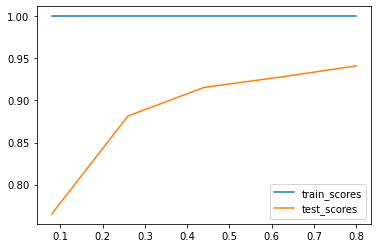

In [27]:
plt.plot(train_sizes_abs/X.shape[0], train_scores.mean(axis=1), label='train_scores')
plt.plot(train_sizes_abs/X.shape[0], test_scores.mean(axis=1), label='test_scores')
plt.legend()
plt.show()

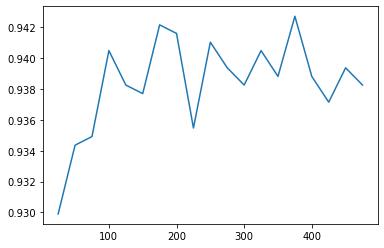

In [30]:
clf = RandomForestClassifier()

params = {"n_estimators": np.arange(25, 500, 25), 
          "max_depth": np.arange(1, 10), 
          "max_features": np.arange(1, 10) / 10}

scores_list = []
for n_estimators in params['n_estimators']:
    clf = RandomForestClassifier(n_estimators=n_estimators)
    scores = cross_val_score(clf, X, y, cv=5)
    scores_list.append(scores.mean())
    
    
plt.plot(params['n_estimators'], scores_list)

In [33]:
X.shape[1]

64

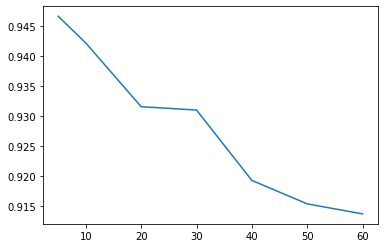

In [34]:
n_features = X.shape[1]
scores_list = []
max_features_list = [5, 10, 20, 30, 40, 50, 60]
for max_features in max_features_list:
    clf = RandomForestClassifier(max_features=max_features)
    scores = cross_val_score(clf, X, y, cv=3)
    scores_list.append(scores.mean())
    
plt.plot(max_features_list, scores_list)

In [37]:
scores_list = []
max_depth_list = list(np.arange(1, 10)) + [None]
for max_depth in max_depth_list:
    clf = RandomForestClassifier(max_depth=max_depth)
    scores = cross_val_score(clf, X, y, cv=3)
    scores_list.append(scores.mean())

In [38]:
scores_list

[0.6828046744574291,
 0.7974401780745687,
 0.8464106844741236,
 0.8814691151919867,
 0.9070673344462993,
 0.9170840289371175,
 0.9309961046188091,
 0.9315525876460767,
 0.9365609348914857,
 0.9398998330550917]

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [44]:
ans5 = "2 3 4 7"

with open('ans5.txt', 'w') as f:
    f.write(ans5)